# Explore MAFs for Neanderthal-introgressed SNPs using 1000 genomes super population data

This code investigates the minor allele frequencies (MAFs) for Neanderthal-introgressed SNPs that are present in the 1000 genomes super population dataset. This dataset contains 5206 SNPs with information regarding the major/minor allele and MAF for 5 super populations: African (AFR), Admixed American (AMR),  East Asian (EAS), European (EUR), South Asian (SAS).

Neanderthal SNPs from:
1. Dannemann M, Prufer K & Kelso J. Functional implications of Neandertal introgression in modern humans. Genome Biol 2017 18:61.
2. Simonti CN et al. The phenotypic legacy of admixture between modern humans and Neandertals. Science 2016 351:737-41.

1000 genomes data from:
* [1000 genomes](http://www.internationalgenome.org/data)

In [1]:
# Import libraries
import pandas as pd
import allel
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

### Create dataframe containing Neanderthal-introgressed SNPs and their MAFs in 5 super populations

In [2]:
# Load comparison_df
comparison_df = pd.read_csv("comparison_df.csv")
comparison_df = comparison_df.drop(columns='Unnamed: 0')
comparison_df['Source'] = comparison_df['Source'].astype('string')
superpop_df = comparison_df

In [3]:
# Load super populations dataset
files = ["afr_47306.vcf", "amr_47306.vcf", "eas_47306.vcf", "eur_47306.vcf", "sas_47306.vcf"]
for filename in files:
    df = allel.vcf_to_dataframe(filename, fields='*', alt_number=1)

    # Format df
    df.drop(columns=["QUAL", "FILTER_PASS", "numalt", "altlen", "is_snp"], inplace=True)
    df = df[:5206] # Last row is empty
    df.rename(columns={"CHROM": "Chromosome", "POS": "Position", "REF": "Major", "ALT": "Minor"}, inplace=True)
    df['Chromosome'] = df['Chromosome'].map(lambda x: x.lstrip('chr'))
    df[['Chromosome', 'Position']] = df[['Chromosome', 'Position']].astype('int64')
    df[['ID', 'Major', 'Minor']] = df[['ID', 'Major', 'Minor']].astype('string')

    # Merge df
    if 'ID' not in superpop_df.columns:
        superpop_df = superpop_df.merge(df, how='left', on=['Chromosome', 'Position'])
    else:
        superpop_df = superpop_df.merge(df, how='left', on=['Chromosome', 'Position', 'ID', 'Major', 'Minor'])

# Format superpop df
superpop_df.rename(columns={"AFR_FREQ": "AFR", "AMR_FREQ": "AMR", "EAS_FREQ": "EAS", "EUR_FREQ": "EUR", "SAS_FREQ": "SAS"}, inplace=True)
superpop_df[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']] = superpop_df[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']].astype('float64')

superpop_df.head()
superpop_df.to_csv("superpop_df.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/allel/io/vcf_read.py:1870: UserWarning: empty CHROM; field: EOL; variant: 5205 (:0)
  chunks = [d[0] for d in it]


,Chromosome,Position,Source,ID,Major,Minor,AFR,AMR,EAS,EUR,SAS
0,1,834360,simonti_only,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
1,1,838695,simonti_only,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
2,1,850373,simonti_only,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
3,1,854793,simonti_only,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
4,1,1880284,simonti_only,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get Neanderthal-introgressed SNPs in super populations dataset
superpop = superpop_df.dropna()
superpop.head()

,Chromosome,Position,Source,ID,Major,Minor,AFR,AMR,EAS,EUR,SAS
127,1,3335874,both,rs117505164,C,T,0.0008,0.0058,0.0188,0.0099,0.0808
134,1,3395755,both,rs72633378,G,A,0.0061,0.1427,0.1716,0.0577,0.1074
135,1,3411396,both,rs77610498,T,C,0.0053,0.1282,0.1310,0.0586,0.0470
137,1,3411561,both,rs2821037,G,A,0.0053,0.1282,0.1300,0.0586,0.0470
139,1,3431555,both,rs947350,C,T,0.0061,0.1412,0.1290,0.0865,0.0644


### Explore MAF for Neanderthal-introgressed SNPs

In [5]:
# Summary stats
superpop[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']].describe()

,AFR,AMR,EAS,EUR,SAS
count,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000
mean,0.037250,0.087290,0.076463,0.095367,0.082868
std,0.179725,0.163718,0.176369,0.156304,0.163753
min,0.000000,0.000000,0.000000,0.001000,0.000000
25%,0.000800,0.017300,0.000000,0.025800,0.016400
50%,0.002300,0.037500,0.006900,0.052700,0.038900
75%,0.005300,0.087900,0.067500,0.098400,0.081800
max,1.000000,0.998600,1.000000,0.993000,0.996900


In [6]:
# Non-parametric tests comparing AFR and EUR MAFs
print(sp.stats.mannwhitneyu(superpop['EUR'], superpop['AFR']))
print(sp.stats.ks_2samp(superpop['EUR'], superpop['AFR']))

MannwhitneyuResult(statistic=1043405.0, pvalue=0.0)
Ks_2sampResult(statistic=0.8796164048153438, pvalue=0.0)


In [7]:
# Correlation between AFR and EUR MAFs
print(sp.stats.pearsonr(superpop['EUR'], superpop['AFR']))
print(sp.stats.spearmanr(superpop['EUR'], superpop['AFR']))

(0.9262872917028372, 0.0)
SpearmanrResult(correlation=0.7452692931199305, pvalue=0.0)


### Plot MAF for Neanderthal-introgressed SNPs in 5 super populations

#### Range of MAFs in super populations

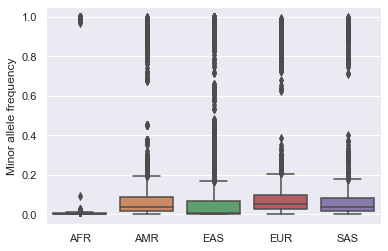

In [8]:
# Boxplot
sns.boxplot(data=superpop[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']])
plt.ylabel("Minor allele frequency")
plt.show()

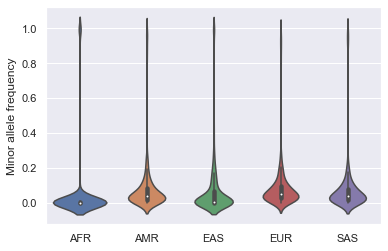

In [9]:
# Violin plot
sns.violinplot(data=superpop[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']])
plt.ylabel("Minor allele frequency")
plt.show()

#### Pair plots

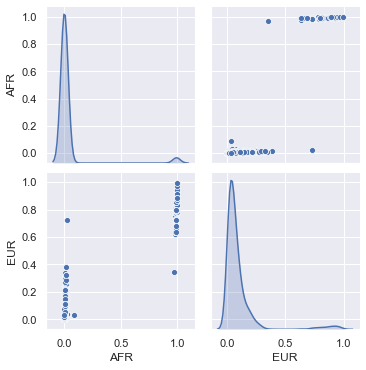

In [10]:
# AFR vs EUR
sns.pairplot(superpop[['AFR', 'EUR']], diag_kind="kde")

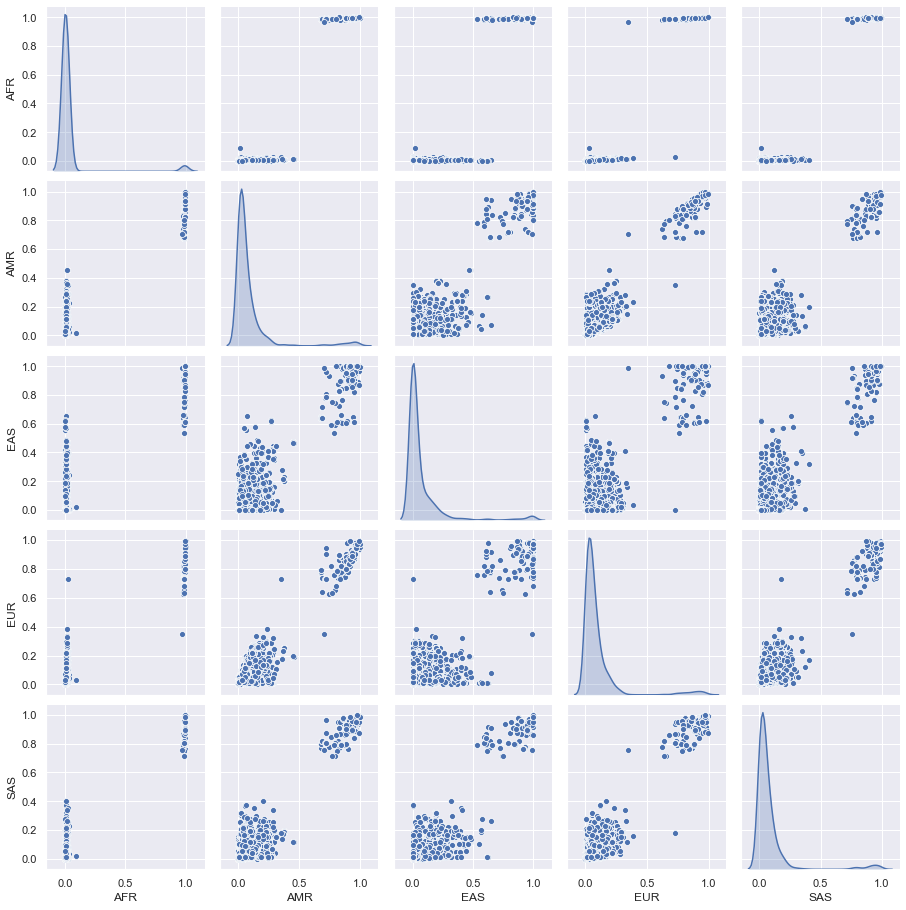

In [11]:
# 5 superpopulations
sns.pairplot(superpop[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']], diag_kind="kde")

#### Range of MAFs by source of Neanderthal-introgressed SNPs

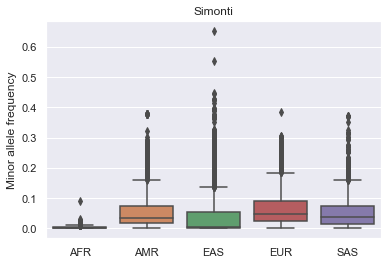

In [12]:
# Simonti
simonti = superpop.loc[superpop.Source != 'dannemann_only'].copy()
simonti['Source'] = 'simonti'
simonti[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']].describe()
sns.boxplot(data=simonti[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']])
plt.ylabel("Minor allele frequency")
plt.title("Simonti")
plt.show()

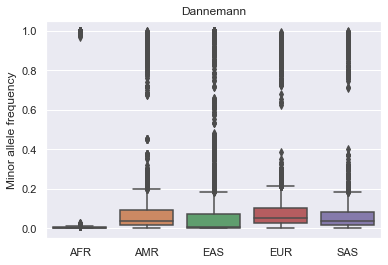

In [13]:
# Dannemann
dannemann = superpop.loc[superpop.Source != 'simonti_only'].copy()
dannemann['Source'] = 'dannemann'
dannemann[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']].describe()
sns.boxplot(data=dannemann[['AFR', 'AMR', 'EAS', 'EUR', 'SAS']])
plt.ylabel("Minor allele frequency")
plt.title("Dannemann")
plt.show()

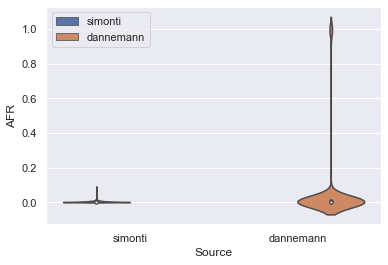

In [14]:
# Simonti vs Dannemann AFR
concat_df = pd.concat([simonti, dannemann], keys=['Chromosome', 'Position', 'Source', 'ID', 'Major',
                                                  'Minor', 'AFR', 'AMR', 'EAS', 'EUR', 'SAS'])
sns.violinplot(x='Source', y='AFR', data=concat_df, hue='Source')
plt.legend(loc='upper left')
plt.show()